In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_price_walk(initial_price, growth, volatility, delta_t, steps, trials=100):
    '''
    Simulate stock price movement using a random walk.

    Arguments:

        initial_price (float) The stock price at time 0.

        growth (float) The stock price growth rate per unit of time.

        volatility (float) The stock price volatility expressed as a
          standard deviation per square root time.

        delta_t (float) The amount of time that passes per step of the
          simulation.

        steps (int) The number of time steps to simulate.

        trials (int) The number of random walks to generate, each using
          the same price, time and growth parameters. Default: 100.

    Returns: array with shape (trials, steps + 1) containing simulated
      prices from time 0 to time (steps * delta_t).
    '''
    prices = np.zeros((trials, steps + 1))
    for trial in range(trials):
        prices[trial, 0] = initial_price
        for step in range(steps):
            prices[trial, step + 1] = prices[trial, step] * (
                1 + growth * delta_t + volatility * np.random.normal(0, delta_t ** 0.5))
    return prices

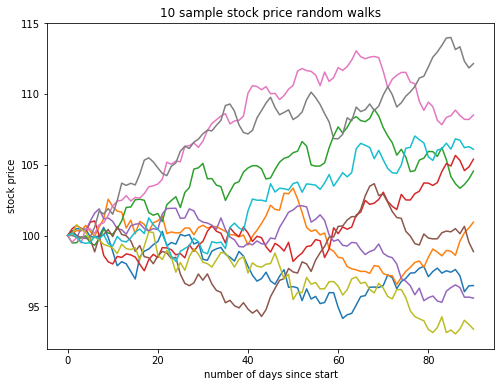

In [2]:
# Generate 100,000 samples of the future price of a stock.
# Note that the result, prices, is an array with shape 100,000 x 90 since
# we have 100,000 repetitions of the simulation and 90 time steps.
prices = random_price_walk(
    initial_price=100,  # The starting price of the stock: 100
    growth=0.075,  # The average growth _per year_ for the stock: 7.5%
    volatility=0.1,  # The _annual_ volatility (standard deviation) of the stock: 10%
    delta_t=1/365,  # The step size: 1 day
    steps=90,  # The number of steps: 90 days
    trials=100000)  # How many times to repeat the simulation

# Plot 10 random price walks, showing how the stock price changes with the number of days.
plt.figure(figsize=(8, 6))
plt.plot(prices[:10].transpose())
plt.title('10 sample stock price random walks')
plt.xlabel('number of days since start')
plt.ylabel('stock price')

plt.show()